In [1]:
source("/home/user/data2/lit/bin/lit_utils.R")
source("/home/user/data3/lit/project/sORFs/sORFs.utils.R")
lib_text()
lib_plot()
library(colorspace)

In [2]:
ancestors_path <- "/home/user/data3/lit/project/sORFs/05-denovo-status/analysis/20251013_denovo_check/processed/check_denovo/merged/merged_ancestors"
spec_out_path <- "/home/user/data3/lit/project/sORFs/05-denovo-status/analysis/20251013_denovo_check/processed/check_denovo/merged/merged_spec.out"
times_in_genome_trans_path <- "/home/user/data3/lit/project/sORFs/05-denovo-status/analysis/20251013_denovo_check/processed/blastp_check/times_in_genome_trans.txt"
outgroup_homolog.peptide_similarity_path <- "/home/user/data3/lit/project/sORFs/05-denovo-status/analysis/20251013_denovo_check/processed/blastp_check/outgroup_homolog.peptide_similarity.txt"

In [3]:
map_path <- "/home/user/data3/lit/project/sORFs/05-denovo-status/analysis/20251013_denovo_check/processed/work_mafsInRegion/safe_map_merged.tsv"

In [4]:
# 读入进化分析的结果；注意这里只挑选了之前1070 list中类型为"ncORF","uORF","uoORF","dORF","doORF"的SEP拿去做进化分析
fread_c(ancestors_path) -> ancestor
fread_c(spec_out_path) -> spec.out
read.table(times_in_genome_trans_path) -> times_in_genome_trans
colnames(times_in_genome_trans) <- c("orf_id","loc_times_blat","gene_times_blastn","gene_times_blastn_pc")
fread_c(outgroup_homolog.peptide_similarity_path) -> outgroup_homolog.peptide_similarity
read.table(map_path) -> map

In [5]:
head(ancestor,1)
head(spec.out,1)
head(times_in_genome_trans,1)
head(outgroup_homolog.peptide_similarity,1)
head(map)

,orf_id,sp,ev_age,syn_age,gained,gained_convergent,lost,denovo,seq
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,PB.4512.328__chr10__8__3611__138__198__noncoding__CTG,hg38,euarchontoglires,placentalia,2,1,1,1,LEQNQVVLILPPTPSHSPF


,orf_id,lineage,farthest species,pident,evalue,qcovs
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,PB.4512.328:chr10:+|8|3611:138:198|noncoding|CTG,catarrhini,PB.4512.328:chr10:+|8|3611:138:198|noncoding|CTG_PB.4512.328:chr10:+|8|3611:138:198|noncoding|CTG_nasLar1_1.000000_0,100,1.25e-11,100


,orf_id,loc_times_blat,gene_times_blastn,gene_times_blastn_pc
,<chr>,<int>,<int>,<int>
1,PB.11812.10:chr12:+|60|3292:748:880|iORF|ATG,1,0,0


,Gene ID,Outgroup Homolog
,<chr>,<chr>
1,PB.11812.10:chr12:+|60|3292:748:880|iORF|ATG,human


,V1,V2
,<chr>,<chr>
1,PB.28982.11__chr22__-__58__3646__605__737__noncoding__TTG,PB.28982.11:chr22:-|58|3646:605:737|noncoding|TTG
2,PB.28982.12__chr22__-__1__3307__3__291__noncoding__CTG,PB.28982.12:chr22:-|1|3307:3:291|noncoding|CTG
3,PB.28982.4__chr22__-__2__2720__13__160__noncoding__TTG,PB.28982.4:chr22:-|2|2720:13:160|noncoding|TTG
4,PB.28982.4__chr22__-__37__2720__444__648__noncoding__ATG,PB.28982.4:chr22:-|37|2720:444:648|noncoding|ATG
5,PB.28982.4__chr22__-__56__2720__617__653__noncoding__TTG,PB.28982.4:chr22:-|56|2720:617:653|noncoding|TTG
6,PB.28983.11__chr22__220__3269__3145__3262__noncoding__ATG,PB.28983.11:chr22:+|220|3269:3145:3262|noncoding|ATG


In [6]:
merge(ancestor,map,by.x="orf_id",by.y="V1") %>% mutate(orf_id=NULL) %>% mutate(orf_id=V2) -> ancestor_1

In [7]:
table(ancestor_1$ev_age)
table(ancestor_1$syn_age)
table(spec.out$lineage)
table(outgroup_homolog.peptide_similarity$`Outgroup Homolog`)


   boreoeutheria       catarrhini euarchontoglires         hominoid 
            3541             1513             3954             1895 
           human           mammal      placentalia         primates 
            1623             6946             7336             2964 
   primatomorpha      simiiformes 
            1115             1365 


   boreoeutheria       catarrhini euarchontoglires         hominoid 
            1189              279              565              173 
          mammal      placentalia         primates    primatomorpha 
           15296            13605              475              108 
     simiiformes 
             562 


   boreoeutheria       catarrhini euarchontoglires         hominoid 
            2980             6393              716             4838 
           human           mammal      placentalia         primates 
            4104             1246             4867              953 
   primatomorpha      simiiformes 
             285             6138 


   boreoeutheria       catarrhini euarchontoglires         hominoid 
             174              221              122               69 
           human           mammal      placentalia         primates 
           31755             1008              110               76 
     simiiformes 
             677 

In [8]:
nrow(ancestor_1)
nrow(spec.out)
nrow(times_in_genome_trans)
nrow(outgroup_homolog.peptide_similarity)

[1] 32252

[1] 32520

[1] 34212

[1] 34212

In [9]:
# 读入newly detected SEP list
# fread("./output/sep_add_basic_ms_ribo_info_group_retained.txt") -> all_sep
# ancestor$orf_id <- sub(ancestor$orf_id,pattern = "__",replacement = ":")
# spec.out$orf_id <- sub(spec.out$orf_id,pattern = "__",replacement = ":")
merge(ancestor_1[,c("orf_id","ev_age","syn_age","denovo")],spec.out[,c("orf_id","lineage")],all.y=T) -> m_evo
m_evo$denovo[is.na(m_evo$denovo)] <- 1
m_evo$ev_age[is.na(m_evo$ev_age)] <- "human"
m_evo$syn_age[is.na(m_evo$syn_age)] <- "human"
# merge(m_evo,all_sep,by.x="orf_id",by.y="ORF_id_trans") -> all_sep_m_evo
# fwrite_c(all_sep_m_evo,"./output/S8/all_sep_m_evo.txt")

merge(m_evo,times_in_genome_trans,by="orf_id") %>% 
  merge(outgroup_homolog.peptide_similarity,by.x = "orf_id",by.y="Gene ID") -> all_sep_m_evo_add_homolog

filter(all_sep_m_evo_add_homolog,denovo==1) -> all_sep_m_evo_add_homolog_denovo

all_sep_m_evo_add_homolog_denovo %>% filter(loc_times_blat<=1 & gene_times_blastn<=1 & gene_times_blastn_pc<=1) -> res_filter_paralog

LEVELS <- c("human","hominoid","catarrhini","simiiformes","primates","primatomorpha","boreoeutheria",
            "placentalia","mammal")
res_filter_paralog$lineage <- factor(res_filter_paralog$lineage,levels=LEVELS)
res_filter_paralog$`Outgroup Homolog` <- factor(res_filter_paralog$`Outgroup Homolog`,levels=LEVELS)
res_filter_paralog$lineage_n <- as.numeric(res_filter_paralog$lineage)
res_filter_paralog$`Outgroup Homolog n` <- as.numeric(res_filter_paralog$`Outgroup Homolog`)
res_filter_paralog %>% filter(lineage_n>=`Outgroup Homolog n`) -> res_filter_paralog_ortholog

In [10]:
head(m_evo)
head(res_filter_paralog_ortholog)

,orf_id,ev_age,syn_age,denovo,lineage
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,PB.1.17:chr1:-|9|4332:86:152|noncoding|CTG,euarchontoglires,placentalia,1,simiiformes
2,PB.1001.36:chr1:-|19|3214:305:440|uORF|ACG,boreoeutheria,mammal,1,boreoeutheria
3,PB.1001.41:chr1:-|232|3689:3159:3267|noncoding|ATG,hominoid,placentalia,1,hominoid
4,PB.10020.9:chr12:+|69|1792:943:1027|noncoding|ATG,mammal,mammal,0,hominoid
5,PB.10021.2:chr12:-|165|2733:2446:2494|dORF|TTG,euarchontoglires,placentalia,1,simiiformes
6,PB.10022.1:chr12:+|164|4074:3091:3292|dORF|TTG,placentalia,mammal,1,human


,orf_id,ev_age,syn_age,denovo,lineage,loc_times_blat,gene_times_blastn,gene_times_blastn_pc,Outgroup Homolog,lineage_n,Outgroup Homolog n
,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>
1,PB.1001.36:chr1:-|19|3214:305:440|uORF|ACG,boreoeutheria,mammal,1,boreoeutheria,1,0,0,human,7,1
2,PB.1001.41:chr1:-|232|3689:3159:3267|noncoding|ATG,hominoid,placentalia,1,hominoid,1,0,0,human,2,1
3,PB.10021.2:chr12:-|165|2733:2446:2494|dORF|TTG,euarchontoglires,placentalia,1,simiiformes,1,0,0,human,4,1
4,PB.10023.12:chr12:+|28|4405:436:517|uORF|ATG,euarchontoglires,mammal,1,primates,1,0,0,human,5,1
5,PB.10023.67:chr12:+|37|3613:976:1165|noncoding|TTG,boreoeutheria,mammal,1,boreoeutheria,1,0,0,simiiformes,7,4
6,PB.10024.77:chr12:-|1|1947:4:217|noncoding|ACG,catarrhini,placentalia,1,human,1,0,0,human,1,1


In [11]:
get_p <- function(df){
  "lineage" -> col
  data <- data.frame(table(df[,col]))
  colnames(data) <- c(col,"Freq")
  data$lineage <- factor(data$lineage,levels=LEVELS)
  p <- ggplot(data,aes_string(x = col, y = "Freq",fill=col)) + 
    geom_bar(stat = "identity",width = 0.8) +
#     scale_y_continuous(expand = c(0, 0),limits=c(0,100)) +
    theme_3(rotate=T)+
    guides(fill = "none")
  p <- p+
    geom_text(aes(label = Freq), 
              position = position_dodge(0.8), # 确保标签对齐柱子
              vjust = -0.3,                  # 根据需要调整位置
              size = 5, color = "black")+
    coord_cartesian(clip = "off")
  p+scale_fill_discrete_divergingx() -> p
  return(p)
}

In [12]:
nrow(m_evo)
merge(m_evo,times_in_genome_trans,by="orf_id") %>% nrow()

[1] 32520

[1] 32520

[1] 32520

[1] 24872

[1] 20514

[1] 19749

[1] 13880

[1] 5352

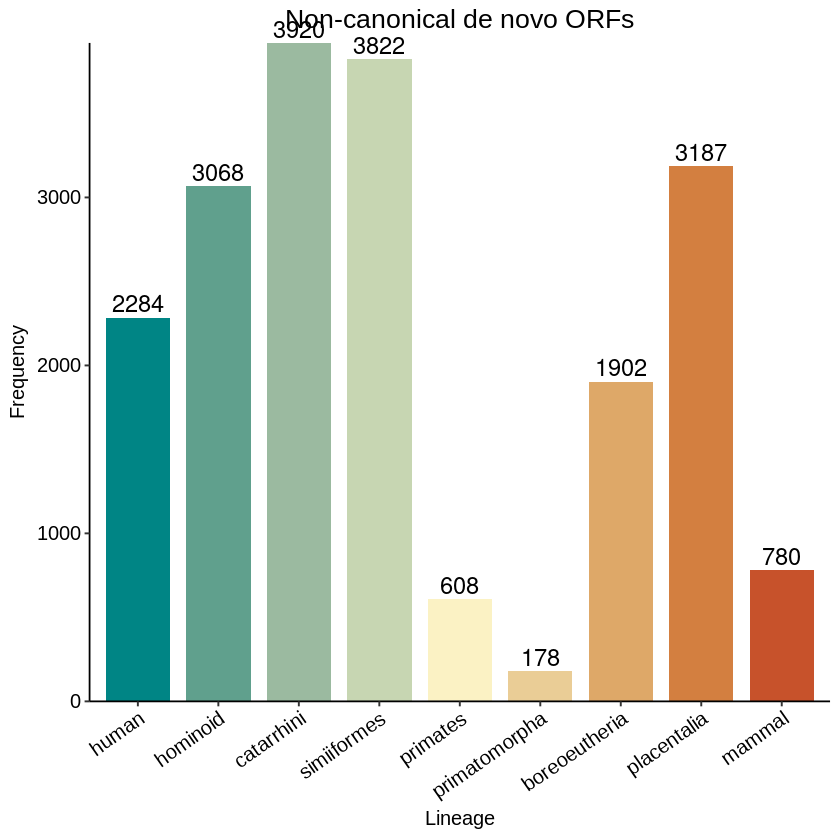

In [25]:
##### plot #####
##### basic number #####
nrow(all_sep_m_evo_add_homolog)
nrow(all_sep_m_evo_add_homolog_denovo)
nrow(res_filter_paralog)
nrow(res_filter_paralog_ortholog)
res_filter_paralog_ortholog %>% filter(lineage %in% c("human","hominoid","catarrhini","simiiformes","primates","primatomorpha")) %>% nrow()
res_filter_paralog_ortholog %>% filter(lineage %in% c("human","hominoid")) %>% nrow()
##### hominoid-specific genes #####
res_filter_paralog_ortholog %>% filter(lineage %in% c("human","hominoid")) -> denovo_genes
# table(denovo_genes$ORF_type_3) %>% sort()
# table(denovo_genes$Scodon) %>% sort()
res_filter_paralog_ortholog -> df 
get_p(df) + labs(x="Lineage",y="Frequency",title="Non-canonical de novo ORFs") + theme(plot.title=element_text(hjust=0.5,size=16))+
scale_y_continuous(expand = c(0, 0)) -> p
p
output_path <- "../figures/"
ggsave(p,filename = o("non_canonical_de_novo_orfs.pdf"),height = 5,width = 5)

In [14]:
fwrite_c(res_filter_paralog_ortholog,"../results/res_filter_paralog_ortholog.txt")